<a href="https://colab.research.google.com/github/dhuMuhammadasif/test/blob/master/13_2_23_modified_simple_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split

In [2]:
df_1 =pd.read_excel('/content/20khz.xlsx')
train_x = np.array(df_1['x'], dtype=np.float64)
train_y = np.array(df_1['y'], dtype=np.float64)

# train_x = np.array(df['x'], dtype=np.float64)
# train_y = np.array(df['y'], dtype=np.float64)
print(train_x.shape, train_y.shape)

(2001,) (2001,)


In [3]:
df_1.head()

,x,y
0,0.00000,-0.00069
1,0.00024,-0.00107
2,0.00095,-0.00092
3,0.00213,-0.00031
4,0.00379,-0.00259


In [4]:
df_1 = df_1[df_1 != 0]

In [5]:
df_1 =df_1 .dropna()

In [204]:
len(df_1['x'])

1996

In [205]:
len(df_1['y'])

1996

In [6]:
n_train = 1000
train_x = train_x[:n_train]
train_y = train_y[:n_train]


In [7]:
print(train_x.shape, train_y.shape)

(1000,) (1000,)


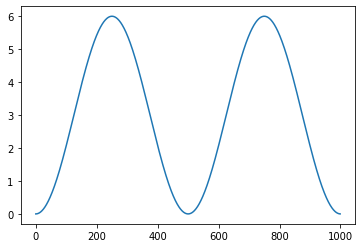

In [8]:
plt.plot(train_x)
plt.show()

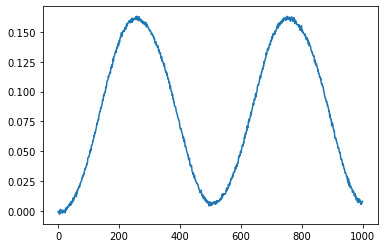

In [9]:
plt.plot(train_y)
plt.show()

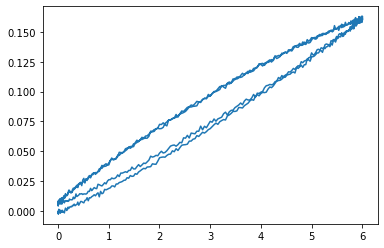

In [10]:
plt.plot(train_x, train_y)
plt.show()

In [11]:
def ewma_vectorized(data, window):
    alpha = 3 /(window + 3)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+2)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out
    

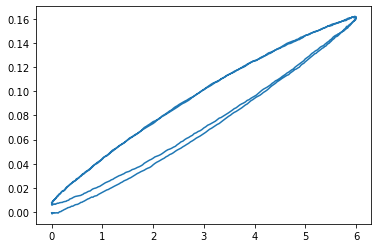

In [12]:
train_y = ewma_vectorized(train_y, 12)
plt.plot(train_x, train_y)
plt.show()

In [213]:
import numpy as np

In [ ]:
train_x.dtype

dtype('float64')

In [ ]:
train_y.dtype

dtype('float64')

In [ ]:
# train_x=train_x.flatten()
# train_y=train_y.flatten()


In [ ]:
# train_x=train_x.reshape(-1,1)
#train_y=train_y.reshape(-1,1)

In [ ]:
# train_y.dtype

In [ ]:
# train_x.dtype

In [13]:
# minimas = signal.argrelmin(train_x)[0]
# maximas = signal.argrelmax(train_x)[0]
minimas = signal.argrelmin(train_x)[0]
maximas = signal.argrelmax(train_x)[0]

minimas_values = train_x[minimas]
maximas_values = train_x[maximas]

minimas_values, maximas_values

(array([0.]), array([6., 6.]))

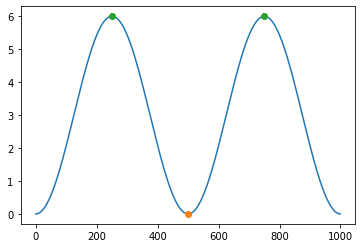

In [14]:
plt.plot(train_x)
plt.plot(minimas, minimas_values, 'o')
plt.plot(maximas, maximas_values, 'o')
plt.show()

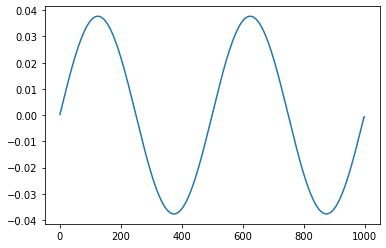

In [87]:
x_diff = np.diff(train_x)
x_diff = np.append(x_diff, x_diff[-1])
plt.plot(x_diff)
plt.show()

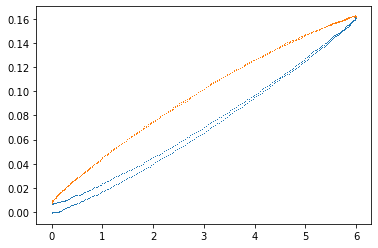

In [16]:
train_x_inc = train_x[x_diff >= 0]
train_y_inc = train_y[x_diff >= 0]
# plt.subplot(2, 1, 1)
# plt.scatter(train_x_inc, train_y_inc)
# plt.show()
                                                    # from where i want to combine inc and dec condition
train_x_dec = train_x[x_diff < 0]
train_y_dec = train_y[x_diff < 0]
#plt.subplot(2, 1, 2)
plt.plot(train_x_inc, train_y_inc,',')
plt.plot(train_x_dec, train_y_dec,',')
plt.show()

In [56]:
len(train_x_dec)


500

In [21]:
def f_inc(x, xp, f_xp, a, b, c, d):
    return (a - b*np.exp(-d*(xp - x)))*(x - xp) + c*f_xp
                                                            
                                                          # from where i want to combine inc and dec condition 
                                                          
def f_dec(x, xp_dec , f_xp_dec, a, b, c, d):
    return (a - b*np.exp(d*(xp_dec  - x)))*(x - xp_dec ) + c*f_xp_dec


In [21]:
print(minimas[0])

500


In [22]:
print(minimas[1:])

[1000 1500]


In [22]:
def predict(x, maximas, a, b, c, d):
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    f_x = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x[i] = f_inc(x[i], xp, f_xp, a, b, c, d)
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
            f_xp = 1 - np.exp(-xp)
    return f_x
                                            # from where i want to combine inc and dec condition 
def predict_dec(x, minimas, a, b, c, d):
    xp_dec = minimas[0]
    minimas = minimas[1:]
    f_xp_dec = 1 - np.exp(xp_dec)
    f_x_dec = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x_dec[i] = f_dec(x[i], xp_dec, f_xp_dec, a, b, c, d)
        if x[i] == xp_dec:
            xp_dec = minimas[0]
            minimas = minimas[1:]
            f_x_dec = 1 - np.exp(xp_dec)
    return f_x_dec

In [23]:
def cost_f_inc(x, y, maximas,  a, b, c, d):
    y_pred_inc = predict(x, maximas, a, b, c, d)
    return np.sum((y - y_pred_inc)**2)
                                              # combining cost # from where i want to combine inc and dec condition 
def cost_f_dec(x, y, minimas,  a, b, c, d):
    y_pred_d = predict_dec(x, minimas, a, b, c, d)
    return np.sum((y - y_pred_d)**2)                                             

In [24]:
a_inc = 0.001
b_inc = 0.001
c_inc = 0.002
d_inc = 0.001
#same as above so replaced the name in inc and dec down cell code
a_dec = 0.002
b_dec = 0.001
c_dec = 0.008
d_dec = 0.001

In [25]:
predict_y = predict(train_x_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)

In [71]:
len(predict_y)

500

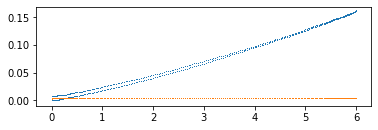

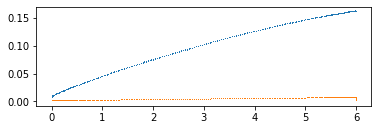

In [26]:
predict_y = predict(train_x_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
predict_y = ewma_vectorized(predict_y, 11)
plt.subplot(2, 1, 1)
plt.plot(train_x_inc, train_y_inc,',')
plt.plot(train_x_inc, predict_y,',')
plt.show()    
                                                  #Combine 
y_pred_dec = predict(train_x_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
y_pred_dec = ewma_vectorized(y_pred_dec, 11)
plt.subplot(2, 1, 2)
plt.plot(train_x_dec, train_y_dec,',')
plt.plot(train_x_dec, y_pred_dec,',')
plt.show()

In [27]:
cost_1 = cost_f_inc(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
cost_1
cost_2 = cost_f_dec(train_x_dec, train_y_dec, minimas_values, a_inc, b_inc, c_inc, d_inc)
cost_2
print(cost_1)
print(cost_2)

4.121356323632536
5.885422767895849


In [28]:
def grad_a(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    cost_deriv = 2*(y - y_pred)
    a_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        a_deriv[i] = x[i] - xp
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(cost_deriv*a_deriv)


def grad_b(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    c_deriv = 2*(y - y_pred)
    b_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        b_deriv[i] = -np.exp(-d*(xp - x[i]))*(x[i] - xp)
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(c_deriv*b_deriv)


def grad_c(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    cost_deriv = 2*(y - y_pred)
    c_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    for i in range(x.shape[0]):
        c_deriv[i] = f_xp
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
            f_xp = 1 - np.exp(-xp)
    return np.sum(cost_deriv*c_deriv)


def grad_d(x, y, maximas, a, b, c, d):
    y_pred = predict(x, maximas, a, b, c, d)
    cost_deriv = 2*(y - y_pred)
    d_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        d_deriv[i] = b*np.exp(-d*(xp - x[i]))*(x[i] - xp)*(xp - x[i])
        if x[i] == xp:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(cost_deriv*d_deriv)

In [29]:
a_derv = grad_a(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
b_derv = grad_b(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
c_derv = grad_c(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
d_derv = grad_d(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)

a_derv, b_derv, c_derv, d_derv

(-96.31848017930457,
 96.04832078618475,
 71.16694107335618,
 -0.26967566193909287)

In [30]:
a_derv = grad_a(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
b_derv = grad_b(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
c_derv = grad_c(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
d_derv = grad_d(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)

a_derv, b_derv, c_derv, d_derv

(384.02374967005295, -385.90676607811355, 0.0, -1.8879054779538644)

In [31]:
def gradient_descent(x, y, maximas, a, b, c, d, alpha, iterations):
    costs = []
    for i in range(iterations):
        y_pred = predict(x, maximas, a, b, c, d)
        cost = cost_f_inc(x, y, maximas, a, b, c, d)
        costs.append(cost)
        if i % 100 == 0:
            print(f'Iteration {i}, cost: {cost}')
        a_grad = grad_a(x, y, maximas, a, b, c, d)
        b_grad = grad_b(x, y, maximas, a, b, c, d)
        c_grad = grad_c(x, y, maximas, a, b, c, d)
        d_grad = grad_d(x, y, maximas, a, b, c, d)
        a = a + alpha*a_grad
        b = b + alpha*b_grad
        c = c + alpha*c_grad
        d = d + alpha*d_grad
    return a, b, c, d, costs


In [32]:
a_inc, b_inc, c_inc, d_inc, costs = gradient_descent(
    train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc, 0.00001, 10000)
#combine
a_dec, b_dec, c_dec, d_dec, costs = gradient_descent(
    train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec, 0.00001, 10000)

Iteration 0, cost: 4.121356323632536
Iteration 100, cost: 1.9701814767469024
Iteration 200, cost: 1.0413995532652356
Iteration 300, cost: 0.5533898615464172
Iteration 400, cost: 0.2970861300951288
Iteration 500, cost: 0.16257903850558875
Iteration 600, cost: 0.09204316444354513
Iteration 700, cost: 0.05507380151688962
Iteration 800, cost: 0.03570110256667909
Iteration 900, cost: 0.025546229716215223
Iteration 1000, cost: 0.02021728186987428
Iteration 1100, cost: 0.017413911414731614
Iteration 1200, cost: 0.015931937314941635
Iteration 1300, cost: 0.015141241638512656
Iteration 1400, cost: 0.01471218049673427
Iteration 1500, cost: 0.014472324419125092
Iteration 1600, cost: 0.014331482278153814
Iteration 1700, cost: 0.014242475766342761
Iteration 1800, cost: 0.014180622159444848
Iteration 1900, cost: 0.014133003907617864
Iteration 2000, cost: 0.014092856951529975
Iteration 2100, cost: 0.014056635955541411
Iteration 2200, cost: 0.014022479424851617
Iteration 2300, cost: 0.0139894068979937

In [ ]:
#cost:  0.010878896898168105 is for inc
#cost: 0.009070891329235681 is for dec

In [97]:
print(maximas_values)

[6. 6.]


In [98]:
print(minimas_values)

[0.]


In [33]:
print(a_inc, b_inc, c_inc, d_inc)

0.010868005037489373 -0.017012365216049014 0.15421366816453613 0.015525828736123142


In [34]:
print(a_dec, b_dec, c_dec, d_dec)

-0.00786765333166358 -0.04918478921814827 0.008 -0.05638100186589827


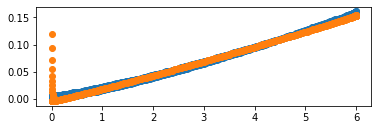

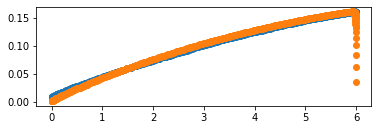

In [35]:
y_pred_inc = predict(train_x_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
y_pred_inc = ewma_vectorized(y_pred_inc, 11)
plt.subplot(2, 1, 1)
plt.scatter(train_x_inc, train_y_inc)
plt.scatter(train_x_inc, y_pred_inc)
plt.show()
                                        #combine
y_pred_dec = predict(train_x_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
y_pred_dec = ewma_vectorized(y_pred_dec, 11)
plt.subplot(2, 1, 2)
plt.scatter(train_x_dec, train_y_dec)
plt.scatter(train_x_dec, y_pred_dec)
plt.show()


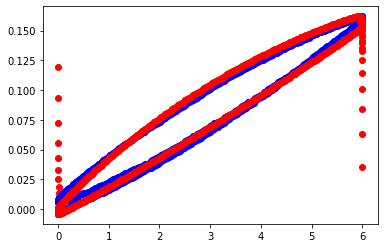

In [36]:
plt.scatter(train_x_inc, train_y_inc,c='b')
plt.scatter(train_x_inc, y_pred_inc,c='r')
plt.scatter(train_x_dec, train_y_dec,c='b')
plt.scatter(train_x_dec, y_pred_dec,c='r')
plt.show()

In [40]:
import sklearn


In [408]:
y_pred_inc=y_pred_inc.flatten()

In [410]:
# dtype=np.int32
y_pred_inc.dtype

dtype('float64')

In [420]:
 y_pred_inc= y_pred_inc.astype(np.float32)

In [421]:
y_pred_inc.dtype

dtype('float32')

In [67]:
y_pred=y_pred_inc+y_pred_dec

In [68]:
train_y=train_y_inc+train_y_dec

In [41]:
rms=sklearn.metrics.mean_squared_error(train_y_inc, y_pred_inc)  
print(rms)

7.576878080592761e-05


In [70]:
rms_c=sklearn.metrics.mean_squared_error(train_y, y_pred)
print(rms_c)

4.9900656689356586e-05


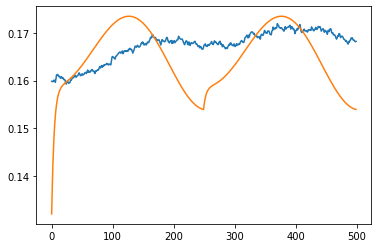

In [76]:
plt.plot(train_y)
plt.plot(y_pred)
plt.show()

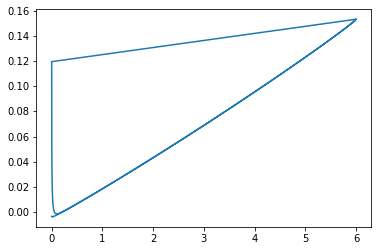

In [84]:
plt.plot(train_x_inc,y_pred_inc)
# plt.scatter(train_x_inc,y_pred_inc)
# plt.scatter(train_x_inc,y_pred_inc)
# plt.show()

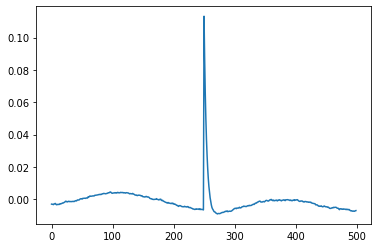

In [42]:
error=y_pred_inc-train_y_inc
plt.plot(error)   
# plt.xlabel('Time (s)')
# plt.ylabel('Error signal')
plt.show()

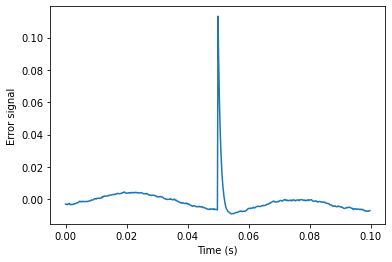

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Set sampling frequency and duration
fs = 5000  # Hz
duration = .1  # seconds

# Generate time array
t = np.arange(duration * fs) / fs
# # Generate actual and predicted sine wave signals
# freq = 2  # Hz
# actual_signal = np.sin(2 * np.pi * freq * t)
# predicted_signal = np.sin(2 * np.pi * (freq + 0.2) * t)

# # Compute error signal
# error_signal = actual_signal - predicted_signal
error_signal=error
# Plot error signal
plt.plot(t, error_signal)
plt.xlabel('Time (s)')
plt.ylabel('Error signal')
plt.show()


In [400]:
rms2=sklearn.metrics.mean_squared_error(train_y_dec, y_pred_dec)  
print(rms2)

9.580856830133197e-05


In [ ]:
plt.plot(train_y_inc,rms1)

In [ ]:
rms=sklearn.metrics.mean_squared_error(train_y_inc,y_pred_dec)
rms=sklearn.metrics.mean_squared_error(train_y_dec,y_pred_dec)


In [235]:
cost = cost_f_inc(train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
cost

0.010822958530402868

In [236]:
cost = cost_f_dec(train_x_dec, train_y_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
cost

5.716993181846701

In [ ]:
#want to find error signal


#from here we want to implement the purpose model for validation

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split

In [448]:
df_2 =pd.read_excel('/content/100khz.xlsx')
train_x_v = np.array(df_2['x'], dtype=np.float64)
train_y_v = np.array(df_2['y'], dtype=np.float64)

In [449]:
df_2 = df_2[df_2 != 0]
df_2 =df_2 .dropna()

In [450]:
print(train_x_v.shape, train_y_v.shape)

(2001,) (2001,)


In [451]:
n_train_v = 1000
train_x_v = train_x_v[:n_train_v]
train_y_v = train_y_v[:n_train_v]


In [452]:
print(train_x_v.shape, train_y_v.shape)

(1000,) (1000,)


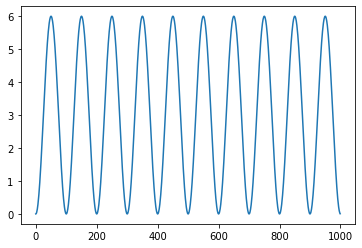

In [453]:
plt.plot(train_x_v)
plt.show()

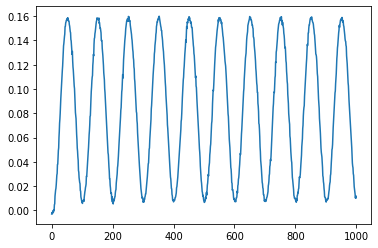

In [454]:
plt.plot(train_y_v)
plt.show()

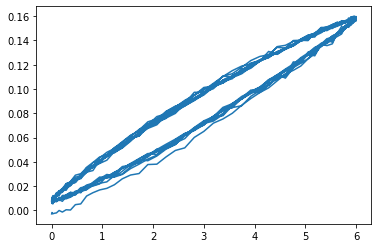

In [455]:
plt.plot(train_x_v, train_y_v)
plt.show()

In [456]:
def ewma_vectorized(data, window):
    alpha = 3 /(window + 3)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+2)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

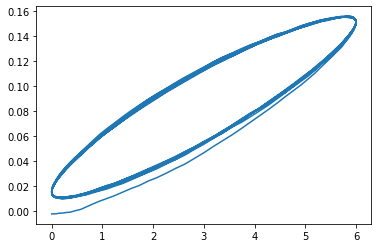

In [457]:
from numpy.lib.function_base import vectorize
train_y_v = ewma_vectorized(train_y_v, 12)
#train_x_v=ewma_vectorized(train_x_v,12)
plt.plot(train_x_v, train_y_v)
plt.show()

In [458]:
print(train_x_v.shape, train_y_v.shape)

(1000,) (1000,)


In [381]:
# import numpy as np
# import math

In [382]:
#from scipy import signal

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # Create an example time series dataset
# #data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50])

# # Reshape the data to fit MinMaxScaler's input shape
# train_x_v = train_x_v.reshape(-1, 1)

# # Create a MinMaxScaler object and fit_transform the data
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(train_x_v)

# #print(data_scaled)
# plt.plot(data_scaled)

In [459]:
print(train_x_v.shape, train_y_v.shape)

(1000,) (1000,)


In [ ]:
train_x_v.flatten()

In [460]:
minimas_v = signal.argrelmin(train_x_v)
maximas_v = signal.argrelmax(train_x_v)

In [461]:
minimas_values_v = train_x_v[minimas_v]
maximas_values_v = train_x_v[maximas_v]
minimas_values_v, maximas_values_v

(array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]))

In [394]:
minimas_values_v.flatten()
# minimas_v.flatten()

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# minimas_values_v=minimas_values_v.flatten()
# minimas_v=

In [427]:
minimas_values_v= minimas_values_v.astype(np.float32)

In [428]:
minimas_values_v.dtype

dtype('float32')

In [430]:
minimas_values_v.shape

(9,)

In [431]:
minimas_v.shape

AttributeError: ignored

In [ ]:
plt.plot(minimas_v, minimas_values_v, 'o')
plt.plot(maximas_v, maximas_values_v, 'o')
plt.show()

In [353]:
minimas_values_v=minimas_values_v.flatten()

In [ ]:
plt.plot(train_x_v)
plt.plot(minimas_v, minimas_values_v, 'o')
plt.plot(maximas_v, maximas_values_v, 'o')
plt.show()

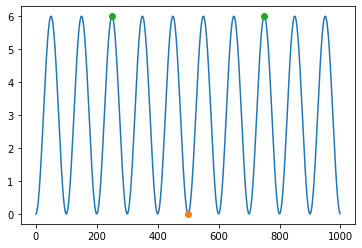

In [465]:
plt.plot(train_x_v)
plt.plot(minimas, minimas_values, 'o')
plt.plot(maximas, maximas_values, 'o')
plt.show()

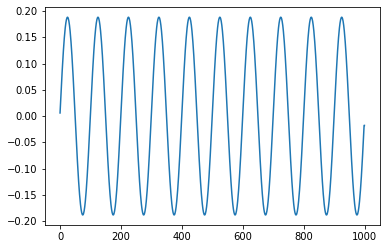

In [466]:
x_diff_v = np.diff(train_x_v)
x_diff_v = np.append(x_diff_v, x_diff_v[-1])
plt.plot(x_diff_v)
plt.show()

In [467]:
train_x_inc_v = train_x_v[x_diff_v >= 0]
train_y_inc_v = train_y_v[x_diff_v >= 0]
# plt.subplot(2, 1, 1)
# plt.scatter(train_x_inc, train_y_inc)
# plt.show()

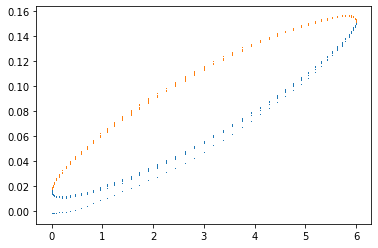

In [468]:
train_x_dec_v = train_x_v[x_diff_v < 0]
train_y_dec_v = train_y_v[x_diff_v < 0]
#plt.subplot(2, 1, 2)
plt.plot(train_x_inc_v, train_y_inc_v,',')
plt.plot(train_x_dec_v, train_y_dec_v,',')
plt.show()

In [ ]:
#tunable parameters
#(a_inc, b_inc, c_inc, d_inc)=0.010868005037489373 -0.017012365216049014 0.15421366816453613 0.015525828736123142
#(a_dec, b_dec, c_dec, d_dec)=-0.00786765333166358 -0.04918478921814827 0.008 -0.05638100186589827

In [469]:
#validation
(a_inc, b_inc, c_inc, d_inc)=(0.010868005037489373, -0.017012365216049014, 0.15421366816453613, 0.015525828736123142)
(a_dec, b_dec, c_dec, d_dec)=(-0.00786765333166358, -0.04918478921814827, 0.008, -0.05638100186589827)
y_pred_dec_v = predict(train_x_dec_v, minimas_values_v, a_dec, b_dec, c_dec, d_dec)
y_pred_inc_v = predict(train_x_inc_v, maximas_values_v, a_inc, b_inc, c_inc, d_inc)

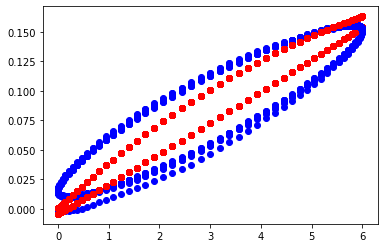

In [470]:
plt.scatter(train_x_inc_v, train_y_inc_v,c='b')
plt.scatter(train_x_inc_v, y_pred_inc_v,c='r')
plt.scatter(train_x_dec_v, train_y_dec_v,c='b')
plt.scatter(train_x_dec_v, y_pred_dec_v,c='r')
plt.show()

# uptill now modelling and tunning of parameters have been done now we want to implement PSO algo for optimization because the rms is but high

#its my attempt to apply PSO on the above mention problem

In [63]:
"""
Angel Gaspar
GitHub: angelgaspar
Last update: December 11th, 2020
Python 3.7

Modifications:
   1.-The initial array written by the user was removed.
   2.-The initial positions are initialized within the search range minimum and maximum randomly.
   3.-The first iteration always was -1.00 the problem was fixed.
   4.-More decimals was added.

Original code without my modifications:
Nathan A. Rooy
Simple Particle Swarm Optimization (PSO) with Python
Last update: 2018-JAN-26
Python 3.6

"""

# --- IMPORT DEPENDENCIES ------------------------------------------------------+
from random import random
from random import uniform


# --- MAIN ---------------------------------------------------------------------+
class Particle:
    def __init__(self, bounds):
        self.position_i = []  # particle position
        self.velocity_i = []  # particle velocity
        self.pos_best_i = []  # best position individual
        self.err_best_i = -1  # best error individual
        self.err_i = -1  # error individual

        for i in range(0, num_dimensions):
            self.velocity_i.append(uniform(-1, 1))
            self.position_i.append(uniform(bounds[i][0], bounds[i][1]))

    # evaluate current fitness
    def evaluate(self, cost_f_inc):
        self.err_i = cost_f_inc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i == -1:
            self.pos_best_i = self.position_i.copy()
            self.err_best_i = self.err_i

    # update new particle velocity
    def update_velocity(self, pos_best_g):
        w = 0.5  # constant inertia weight (how much to weigh the previous velocity)
        c1 = 0.5  # cognitive constant
        c2 = 0.5  # social constant

        for i in range(0, num_dimensions):
            r1 = random()
            r2 = random()

            vel_cognitive = c1 * r1 * (self.pos_best_i[i] - self.position_i[i])
            vel_social = c2 * r2 * (pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w * self.velocity_i[i] + vel_cognitive + vel_social

    # update the particle position based off new velocity updates
    def update_position(self, bounds):
        for i in range(0, num_dimensions):
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]


def minimize(cost_f_inc, dimensions, bounds, num_particles, max_iter, verbose=False):
    global num_dimensions

    num_dimensions = dimensions
    err_best_g = -1  # best error for group
    pos_best_g = []  # best position for group

    # establish the swarm
    swarm = []
    for i in range(0, num_particles):
        swarm.append(Particle(bounds))

    # begin optimization loop
    i = 1
    while i <= max_iter:

        # cycle through particles in swarm and evaluate fitness
        for j in range(0, num_particles):
            swarm[j].evaluate(cost_f_inc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g = list(swarm[j].position_i)
                err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0, num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)

        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.12f}')

        i += 1

    # print final results
    print('\nFINAL SOLUTION:')
    print("\tPositions: ", pos_best_g)
    print("\tBest Solution: ", err_best_g)

    pass

In [67]:
# objective Function
# def sphere(x):
#     total = 0
#     for i in range(len(x)):
#         total += x[i] ** 2
#     return total


# settings
# num_dimensions = 2  # dimensions
# bounds = [(-10, 10), (-10, 10)]  # input bounds [(x1_min, x1_max), (x2_min, x2_max), ...]
num_dimensions = 8  # dimensions
bounds = [(-0.015231471371135752,0.0056791097541811775),(-0.0232962506162296, -0.06514327904306272),(0.008,0.14839333484923922),(-0.07315198395974613, 0.0254763276769475)]  # input bounds [(x1_min, x1_max), (x2_min, x2_max), ...]
#minimize(sphere, num_dimensions, bounds, num_particles=501, max_iter=30, verbose=True)
y_pred_inc=minimize(cost_f_inc, num_dimensions, bounds, num_particles=500, max_iter=10, verbose=True)
# #train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc   y_pred_inc
# If X = [a,b,c,d], n = 4 and if
#         bound = [(-0.015231471371135752,0.0056791097541811775),(-0.0232962506162296, -0.06514327904306272),(0.008,0.14839333484923922),(-0.07315198395974613, 0.0254763276769475)]
#         Then, a∈(-0.015231471371135752,0.0056791097541811775); b∈(-0.0232962506162296, -0.06514327904306272); c∈(0.008,0.14839333484923922,(-0.07315198395974613, 0.0254763276769475))

IndexError: ignored

In [ ]:
"""
Angel Gaspar
GitHub: angelgaspar
Last update: December 11th, 2020
Python 3.7

Modifications:
   1.-The initial array written by the user was removed.
   2.-The initial positions are initialized within the search range minimum and maximum randomly.
   3.-The first iteration always was -1.00 the problem was fixed.
   4.-More decimals was added.

Original code without my modifications:
Nathan A. Rooy
Simple Particle Swarm Optimization (PSO) with Python
Last update: 2018-JAN-26
Python 3.6

"""

# --- IMPORT DEPENDENCIES ------------------------------------------------------+
from random import random
from random import uniform


# --- MAIN ---------------------------------------------------------------------+
class Particle:
    def __init__(self, bounds):
        self.position_i = []  # particle position
        self.velocity_i = []  # particle velocity
        self.pos_best_i = []  # best position individual
        self.err_best_i = -1  # best error individual
        self.err_i = -1  # error individual

        for i in range(0, num_dimensions):
            self.velocity_i.append(uniform(-1, 1))
            self.position_i.append(uniform(bounds[i][0], bounds[i][1]))

    # evaluate current fitness
    def evaluate(self, cost_function):
        self.err_i = cost_function(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i == -1:
            self.pos_best_i = self.position_i.copy()
            self.err_best_i = self.err_i

    # update new particle velocity
    def update_velocity(self, pos_best_g):
        w = 0.5  # constant inertia weight (how much to weigh the previous velocity)
        c1 = 0.5  # cognitive constant
        c2 = 0.5  # social constant

        for i in range(0, num_dimensions):
            r1 = random()
            r2 = random()

            vel_cognitive = c1 * r1 * (self.pos_best_i[i] - self.position_i[i])
            vel_social = c2 * r2 * (pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w * self.velocity_i[i] + vel_cognitive + vel_social

    # update the particle position based off new velocity updates
    def update_position(self, bounds):
        for i in range(0, num_dimensions):
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]


def minimize(cost_function, dimensions, bounds, num_particles, max_iter, verbose=False):
    global num_dimensions

    num_dimensions = dimensions
    err_best_g = -1  # best error for group
    pos_best_g = []  # best position for group

    # establish the swarm
    swarm = []
    for i in range(0, num_particles):
        swarm.append(Particle(bounds))

    # begin optimization loop
    i = 1
    while i <= max_iter:

        # cycle through particles in swarm and evaluate fitness
        for j in range(0, num_particles):
            swarm[j].evaluate(cost_function)

            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g = list(swarm[j].position_i)
                err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0, num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)

        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.12f}')

        i += 1

    # print final results
    print('\nFINAL SOLUTION:')
    print("\tPositions: ", pos_best_g)
    print("\tBest Solution: ", err_best_g)

    pass


# objective Function
# def sphere(x):
#     total = 0
#     for i in range(len(x)):
#         total += x[i] ** 2
#     return total


# settings
# num_dimensions = 2  # dimensions
# bounds = [(-10, 10), (-10, 10)]  # input bounds [(x1_min, x1_max), (x2_min, x2_max), ...]
num_dimensions = 4  # dimensions
bounds = [(-0.015231471371135752,0.0056791097541811775),(-0.0232962506162296, -0.06514327904306272),(0.008,0.14839333484923922),(-0.07315198395974613, 0.0254763276769475)]  # input bounds [(x1_min, x1_max), (x2_min, x2_max), ...]
#minimize(sphere, num_dimensions, bounds, num_particles=500, max_iter=30, verbose=True)
y_pred_inc=minimize(train_x_inc, train_y_inc, maximas_values, num_dimensions, bounds, num_particles=500, max_iter=30, verbose=True)
# #train_x_inc, train_y_inc, maximas_values, a_inc, b_inc, c_inc, d_inc   y_pred_inc
# If X = [a,b,c,d], n = 4 and if
#         bound = [(-0.015231471371135752,0.0056791097541811775),(-0.0232962506162296, -0.06514327904306272),(0.008,0.14839333484923922),(-0.07315198395974613, 0.0254763276769475)]
#         Then, a∈(-0.015231471371135752,0.0056791097541811775); b∈(-0.0232962506162296, -0.06514327904306272); c∈(0.008,0.14839333484923922,(-0.07315198395974613, 0.0254763276769475))

In [ ]:
minimize(sphere, num_dimensions, bounds, num_particles=500, max_iter=30, verbose=True)